In [1]:
import warnings
warnings.filterwarnings('ignore')



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('Ratings.csv')
b = pd.read_csv('Books.csv')

In [3]:
#Rating
r.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
r.shape

(1149780, 3)

In [5]:
for col in r.columns:
    print(f"Number of {col} is {r[col].nunique()}")

Number of User-ID is 105283
Number of ISBN is 340556
Number of Book-Rating is 11


In [6]:
#Books
b.shape

(271360, 8)

In [7]:
b.head(4).T

,0,1,2,3
ISBN,0195153448,0002005018,0060973129,0374157065
Book-Title,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic...
Book-Author,Mark P. O. Morford,Richard Bruce Wright,Carlo D'Este,Gina Bari Kolata
Year-Of-Publication,2002,2001,1991,1999
Publisher,Oxford University Press,HarperFlamingo Canada,HarperPerennial,Farrar Straus Giroux
Image-URL-S,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...
Image-URL-M,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...
Image-URL-L,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...


In [8]:
#check missing value
dataset = [r, b]
for data in dataset:
    print(data.isnull().values.any())

False
True


In [9]:
#check duplicated rows
for data in dataset:
    print(data.duplicated().values.any())

False
False


In [10]:
#There is no duplicate row in both dataset, but we have missing value in book metadata.

In [11]:
#make a copy 
books = b.copy()

In [12]:
percent_missing = books.isnull().sum() * 100 / len(books)
missing_value = (pd.DataFrame({'percent_missing': percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
Image-URL-L,0.00
Publisher,0.00
Book-Author,0.00


In [13]:
#keep important columns, drop the rest
cols_to_keep = ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books = books[cols_to_keep]

In [14]:
#display max column
with pd.option_context('display.max_colwidth', None):
    display(books.head(5))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [15]:

print(books.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [16]:
print(r.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


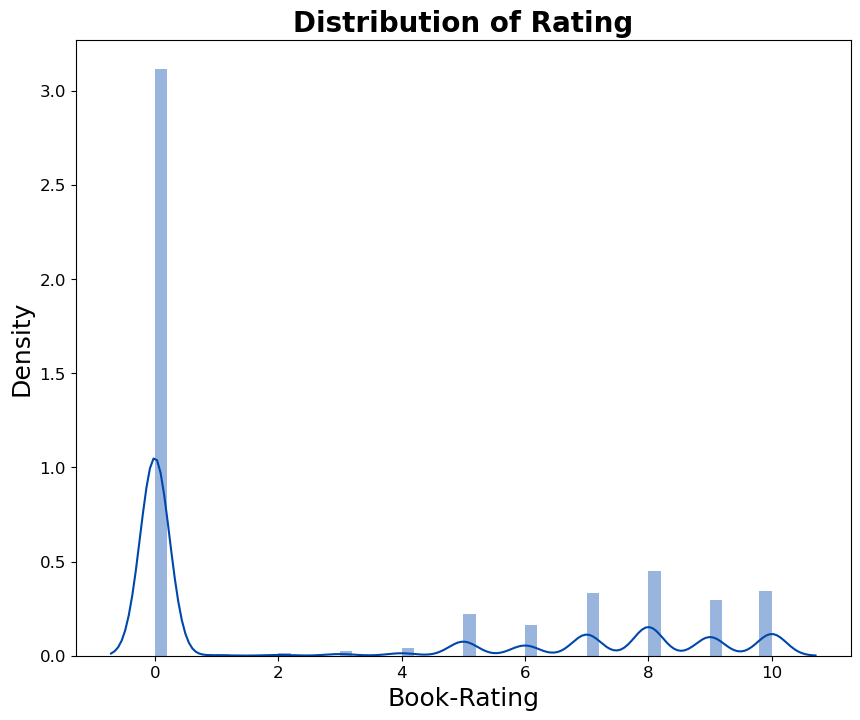

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(r['Book-Rating'], color = '#0047AB')
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('Book-Rating', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
r.describe()

,User-ID,Book-Rating
count,1149780.00,1149780.00
mean,140386.40,2.87
std,80562.28,3.85
min,2.00,0.00
25%,70345.00,0.00
50%,141010.00,0.00
75%,211028.00,7.00
max,278854.00,10.00


In [19]:
# Merge the datasets based on book identifier
combined_data = pd.merge(b, r, on='ISBN')

# Display the combined dataset
print(combined_data.head())

         ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                

In [20]:
# Let's check authors with biggest number of rates (total number for all books)
high_rating_author = combined_data.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

Book-Author
Hieronymous Kitsch   10.00
Benjamin M. Schutz   10.00
Ben Sonder           10.00
Emanuel F. Hammer    10.00
Emberley             10.00
Name: Book-Rating, dtype: float64

In [48]:
combined_data.to_csv('merged.csv')

In [49]:
combined_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [23]:
fd = pd.read_csv('merged.csv')

In [24]:
fd.shape

(1031136, 11)

In [25]:
fd.head(4)

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8


In [26]:
book_pivot= fd.pivot_table(index ='Book-Title', columns= 'Book-Rating', values ='User-ID')

In [27]:
book_pivot.shape

(241071, 11)

In [28]:
from scipy.sparse import csr_matrix

In [29]:
book_sparse = csr_matrix(book_pivot)

In [30]:
book_sparse

<241071x11 sparse matrix of type '<class 'numpy.float64'>'
	with 2651781 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy='mean')
book_sparse = imputer.fit_transform(book_sparse)

In [33]:
scaler = StandardScaler(with_mean=False)
book_sparse = scaler.fit_transform(book_sparse)

In [34]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors (algorithm= 'brute')

In [35]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [36]:
book_sparse

<241071x11 sparse matrix of type '<class 'numpy.float64'>'
	with 2651781 stored elements in Compressed Sparse Row format>

In [37]:
book_pivot_filled = book_pivot.fillna(book_pivot.mean())


In [38]:
# Reshape and find nearest neighbors
distance, suggestion = model.kneighbors(book_pivot_filled.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

In [39]:
distance

array([[444207.39071525, 444207.48541358, 444208.14325747,
        444208.46461564, 444208.78595609, 444209.16269906]])

In [40]:
suggestion

array([[ 26698,  17259,  43112, 124277, 181325, 212867]], dtype=int64)

In [41]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Bored of the Rings: A Parody of J.R.R. Tolkien's the Lord of the Rings',
       'At Home in Mitford (The Mitford Years)', 'Daddy's Little Girl',
       'Mr. X', 'The Claiming of Sleeping Beauty (Sleeping Beauty)',
       'The Wasp Factory'],
      dtype='object', name='Book-Title')


In [42]:
books_name = book_pivot.index

In [43]:
import pickle
pickle.dump (model, open('artifacts/model.pkl', 'wb'))
pickle.dump (books_name, open('artifacts/books_name.pkl', 'wb'))
pickle.dump(fd, open('artifacts/fd.pkl', 'wb'))
pickle.dump (book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

In [44]:
import ipywidgets

In [47]:
import ipywidgets as widgets
from IPython.display import display

text = widgets.Text(value='',
                   placeholder='Type here',
                   description='String:',
                   disabled=False)

instructions = widgets.HTML('Enter book: ')
display(instructions)
display(text)

def recommend_book(book_name):
    # Your book recommendation logic goes here
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot_filled.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        print("Recommended Books: ")
        for j in books:
            print(j)

def on_submit_handler(sender):
    recommend_book(text.value)

text.on_submit(on_submit_handler)


HTML(value='Enter book: ')

Text(value='', description='String:', placeholder='Type here')